# SCANPLOT - Um sistema de plotagem simples para o SCANTEC

O SCANPLOT é um módulo escrito em linguagem Python preparado para ler e plotar as tabelas com as estatísticas do SCANTEC. O seu uso pode ser feito por meio da linha de comando ou atrvés do Jupyter. O SCANPLOT transforma as tabelas do SCANTEC em dataframes do Pandas e pode ser facilmente extendido a partir da introdução de funções para a plotagem destes dataframes na forma como o usuário precisar.

O módulo `scanplot` possui as seguintes funções:

1. `read_namelists`: esta função lê os arquivos de namelist e definições dos modelos do SCANTEC;
2. `get_dataframe`: esta função transforma uma ou mais tabelas em dataframes do Pandas, acessíveis por meio de um dicionário;
3. `plot_lines`: esta função plota gráficos de linhas a partir dos dataframes.

As funções possuem formas específicas de utilização. Para saber como utilizá-las, carregue primeiro a função a partir do módulo principal (por exemplo, a função `read_namelists`):

```Python
from scanplot import read_namelists
```

E em seguida, digite uma das suas formas a seguir:

```Python
help(read_namelists)
```

ou

```Python
print(red_namelists)
```

## Leitura dos namelists do SCANTEC

O SCANTEC é um software de linha de comando escrito em linguagem Fortran preparado para ler, interpolar e calcular as estatísticas básicas (Viés, Raiz do Erro Quadrático Médio e Correlação de Anomalias) a partir de modelos de previsão numérica de tempo, como os modelos BAM, BRAMS e Eta. O SCANPLOT faz o trabalho de plotar os resultados a partir das tabelas com o resumo destas estatísticas. Para utilizar o SCANPLOT, o usuário deve ler os arquivos de namelist e definições dos modelos utilizados nas avaliações de forma que o software saiba quais foram as definições utilizadas pelo usuário e em que local estão armazenadas as tabelas com os resultados.

Para isso, basta carregar a função `read_namelists` a partir do módulo principal `scanplot`, com o seguinte comando:

In [1]:
from scanplot import read_namelists

Para conhecer como deve ser utilizada a função `read_namelists`, o usuário pode utilizar um dos comandos a seguir:

In [2]:
print(read_namelists.__doc__)
#help(read_namelists)


    read_namelists
    
    Esta função lê os namelists e arquivos de definições dos modelos do SCANTEC e
    retorna para o usuário dois dicionários, VarsLevs e Confs, com as informações lidas.
    
    Parâmetros de entrada
    ---------------------
        basepath : diretório raiz da instalação do SCANTEC.
        
    Resultados
    ----------
        VarsLevs : dicionário com as variáveis, níveis e nomes definidos no arquivo scantec.vars
        Confs    : dicionário com as definições contidas no arquivo scantec.conf
    
    Uso
    ---
        from scanplot import read_namelists
        data_vars, data_conf = read_namelists("~/SCANTEC")
    


A função `read_namelists` recebe um caminho (raiz da instalação do SCANTEC) como parâmetro de entrada e retorna para o usuário dois dicionários, os quais contém as informações dos arquivos `scantec.conf` e `scantec.vars` do SCANTEC. Estes arquivos possuem as definições dos modelos (intervalo de tempo da avalação, nome do modelo, resolução, caminhos etc). Os nomes `data_vars` e `data_conf` são os nomes dos objetos que serão criados e que conterão os dicionários com as definições dos arquivos `scantec.vars` e `scantec.conf`, respectivamente. A escolha destes nomes fica a critério do usuário.

In [3]:
data_vars, data_conf = read_namelists("/Volumes/RAID0/carlos/Documents/INPE2020/SCANTEC/ilopolis/SCANTEC.2.0.0b1")

Para inspecionar o conteúdo e a estrutura dos dados contidos nos objetos `data_conf` e `data_vars`, basta digitar os nomes no prompt;

In [4]:
data_conf

{'Starting Time': datetime.datetime(2014, 8, 5, 0, 0),
 'Ending Time': datetime.datetime(2014, 8, 6, 0, 0),
 'Analisys Time Step': '12',
 'Forecast Time Step': '24',
 'History Time': '48',
 'scantec tables': '/home/carlos.bastarz/SCANTEC.2.0.0b1/tables',
 'run domain number': '1',
 'run domain lower left lat': '-49.875',
 'run domain lower left lon': '-82.625',
 'run domain upper right lat': '11.375',
 'run domain upper right lon': '-35.375',
 'run domain resolution dx': '0.4',
 'run domain resolution dy': '0.4',
 'Reference Model Name': 'BAM_TQ0299L064_1',
 'Reference file': '/dados/das/public/SCANTEC/TestCase/AGCM/TQ0299L064/%y4%m2%d2%h2/GPOSNMC%y4%m2%d2%h2%y4%m2%d2%h2P.icn.TQ0299L064.ctl',
 'Experiments': {'EXP01': ['BAM_TQ0299L064_1',
   '/dados/das/public/SCANTEC/TestCase/AGCM/TQ0299L064/%y4%m2%d2%h2/GPOSNMC%iy4%im2%id2%ih2%fy4%fm2%fd2%fh2P.fct.TQ0299L064.ctl']},
 'Climatology Model Name': '3',
 'Climatology file': '/dados/das/public/SCANTEC/climatologia/climatologia50yr.%mc.bin',

In [5]:
data_vars

{0: ('VTMP:925', 'Virtual Temperature @ 925 hPa [K]'),
 1: ('VTMP:850', 'Virtual Temperature @ 850 hPa [K]'),
 2: ('VTMP:500', 'Virtual Temperature @ 500 hPa [K]'),
 3: ('TEMP:850', 'Absolute Temperature @ 850 hPa [K]'),
 4: ('TEMP:500', 'Absolute Temperature @ 500 hPa [K]'),
 5: ('TEMP:250', 'Absolute Temperature @ 250 hPa [K]'),
 6: ('PSNM:000', 'Pressure reduced to MSL [hPa]'),
 7: ('UMES:925', 'Specific Humidity @ 925 hPa [g/Kg]'),
 8: ('UMES:850', 'Specific Humidity @ 850 hPa [g/Kg]'),
 9: ('UMES:500', 'Specific Humidity @ 500 hPa [g/Kg]'),
 10: ('AGPL:925', 'Inst. Precipitable Water @ 925 hPa [Kg/m2]'),
 11: ('ZGEO:850', 'Geopotential height @ 850 hPa [gpm]'),
 12: ('ZGEO:500', 'Geopotential height @ 500 hPa [gpm]'),
 13: ('ZGEO:250', 'Geopotential height @ 250 hPa [gpm]'),
 14: ('UVEL:850', 'Zonal Wind @ 850 hPa [m/s]'),
 15: ('UVEL:500', 'Zonal Wind @ 500 hPa [m/s]'),
 16: ('UVEL:250', 'Zonal Wind @ 250 hPa [m/s]'),
 17: ('VVEL:850', 'Meridional Wind @ 850 hPa [m/s]'),
 18: ('V

Com as informações dos arquivos de namelist do SCANTEC carregados, o próximo passo é ler as tabelas geradas na avaliação com o SCANTEC e transformá-las em dataframes do Pandas. Para isso, o usuário deverá utilizar a função `get_dataframe` do módulo `scanplot`:

In [6]:
from scanplot import get_dataframe

Da mesma forma como foi feito com a função `read_namelists`, pode-se digitar o comand `print(funcao.__doc__)` ou simplesmente, `help(funcao)` para descobrir como a função deve ser utilizada:

In [7]:
#print(get_dataframe.__doc__)
help(get_dataframe)

Help on function get_dataframe in module scanplot:

get_dataframe(dataInicial, dataFinal, Stats, outDir)
    get_dataframe
    
    Esta função transforma a(s) tabela(s) do SCANTEC em dataframe(s).
    
    Parâmetros de entrada
    ---------------------
        dataInicial : objeto datetime com a data inicial do experimento
        dataFinal   : objeto datetime com a data final do experimento
        Stats       : lista com os nomes das estatísticas a serem processadas
        outDir      : string com o diretório com as tabelas do SCANTEC
    
    Resultado
    ---------
        Dicionário com o(s) dataframe(s) com a(s) tabela(s) do SCANTEC.
    
    Uso
    ---
        from scanplot import get_dataframe
        
        dataInicial = data_conf["Starting Time"]
        dataFinal = data_conf["Ending Time"]
        Stats =  ["ACOR", "RMSE", "VIES"]
        outDir = data_conf["Output directory"]
        
        dTable = get_dataframe(dataInicial,dataFinal,Stats,outDir)



A função `get_dataframe` recebe uma série de parâmetros de entrada e retorna um dicionário com uma ou mais tabelas que já estarão no formado de dataframe do Pandas. Na célula a seguir, serão definidos os valores de entrada da função `get_dataframe` a partir dos dicionários `data_conf` e `data_vars`, criados anteriormente.

Observe que os parâmetros `Vars` e `Stats` são atribuídos de formas diferentes dos demais. O parâmetro `Stats` é uma lista que deve possuir pelo menos um elemento e ele sempre deve possuir a forma `Stat = [...]`. Na versão atual do SCANPLOT, o usuário pode escolher as estatísticas `ACOR` (correlação de anomalias), `RMSE` (raiz do erro quadrático médio) e `VIES` (viés), em qualquer ordem ou combinação entre elas. O parâmetro `Vars` também é uma lista, mas é definido de forma diferente. O usuário deve observar que no dicionário `data_vars`, para cada índice está associado uma tupla do tipo `('VAR:LEV', 'Nome da Variável @ Nível hPa [unidade]')`.  Isto foi feito para facilitar ao usuário a escolha da variável, pois ao invés de se digitar o nome da variável, basta escolher pelo menos um dos índices do dicionário `data_vars` que deseja, da seguinte forma `Vars = list(map(data_vars.get,[1,2,3,...]`. 

In [8]:
dataInicial = data_conf["Starting Time"]
dataFinal = data_conf["Ending Time"]
Vars = list(map(data_vars.get,[12,14]))
Stats = ["ACOR", "RMSE", "VIES"]
outDir = data_conf["Output directory"]

Com a definição dos parâmetros de entrada da função `get_dataframe`, a sua utilização é feita da seguinte forma:

In [9]:
dTable = get_dataframe(dataInicial,dataFinal,Stats,outDir)

Na chamada da função `get_dataframe`, o objeto `dTable` é um dicionário que deverá conter as tabelas escolhidas pelo usuário a partir do ajuste dos parâmetros de entrada da função. Para inspecionar o conteúdo do dicionário `dTable`, basta digitar no prompt:

In [10]:
dTable

{'ACOREXP01_20140805002014080600T.scan':    %Previsao  vtmp:925  vtmp:850  vtmp:500  temp:850  temp:500  temp:250  \
 0          0       0.0       0.0       0.0     1.000     1.000     1.000   
 1         24       0.0       0.0       0.0     0.993     0.997     0.992   
 2         48       0.0       0.0       0.0     0.986     0.984     0.981   
 3         72       0.0       0.0       0.0     0.975     0.961     0.972   
 
    psnm:000  umes:925  umes:850  ...  agpl:925  zgeo:850  zgeo:500  zgeo:250  \
 0     1.000     1.000     1.000  ...     1.000     1.000     1.000     1.000   
 1     0.982     0.975     0.966  ...     0.984     0.991     0.999     0.999   
 2     0.970     0.942     0.931  ...     0.963     0.981     0.993     0.993   
 3     0.951     0.943     0.908  ...     0.943     0.976     0.984     0.984   
 
    uvel:850  uvel:500  uvel:250  vvel:850  vvel:500  vvel:250  
 0     1.000     1.000     1.000     1.000     1.000     1.000  
 1     0.972     0.986     0.987    

No dicionário `dTable`, observe que foram carregadas as tabelas referente às estatísticas escolhidas (`VIES`, `RMS` e `ACOR`). Para visualizar o dataframe da tabela, basta passar o nome da tabela como key do dicionário dTable, como em `dTable['NOME_TABELA']`. Veja o exemplo a seguir:

In [11]:
dTable['ACOREXP01_20140805002014080600T.scan']

,%Previsao,vtmp:925,vtmp:850,vtmp:500,temp:850,temp:500,temp:250,psnm:000,umes:925,umes:850,...,agpl:925,zgeo:850,zgeo:500,zgeo:250,uvel:850,uvel:500,uvel:250,vvel:850,vvel:500,vvel:250
0,0,0.0,0.0,0.0,1.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
1,24,0.0,0.0,0.0,0.993,0.997,0.992,0.982,0.975,0.966,...,0.984,0.991,0.999,0.999,0.972,0.986,0.987,0.939,0.965,0.969
2,48,0.0,0.0,0.0,0.986,0.984,0.981,0.970,0.942,0.931,...,0.963,0.981,0.993,0.993,0.959,0.978,0.968,0.892,0.869,0.853
3,72,0.0,0.0,0.0,0.975,0.961,0.972,0.951,0.943,0.908,...,0.943,0.976,0.984,0.984,0.941,0.965,0.930,0.821,0.824,0.766


## Explorando os dataframes

Dataframes do Pandas são dados tabulados que possuem uma série de funções e métodos que podem ser aplicados também com as tabelas do SCANTEC. Veja nos exemplos a seguir forma de selecionar as colunas e plotar os dados de forma individual ou agrupada.

No exemplo a seguir, é feita a seleção da coluna referente à correleção de anomalias da temperatura absoluta em 850 hPa. Para isso, utiliza-se o método `loc` para fazer a subseleção do dataframe. O método `loc` em um dataframe indexa os valores da tabela a partir dos índices da linha e da coluna, respectivamente (`loc[linha,coluna]`):

In [12]:
dTable['ACOREXP01_20140805002014080600T.scan'].loc[:,"temp:850"]

0    1.000
1    0.993
2    0.986
3    0.975
Name: temp:850, dtype: float64

O dataframe do Pandas permite também realizar a plotagem da subseleção realizada utilizando a função `plot()`. Veja no exemplo a seguir:

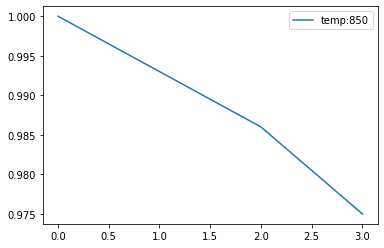

In [13]:
dTable['ACOREXP01_20140805002014080600T.scan'].loc[:,["temp:850"]].plot()

Com o método `loc`, é possível também escolher mais do que uma coluna. Veja o exemplo a seguir e compare-o com o exemplo anterior:

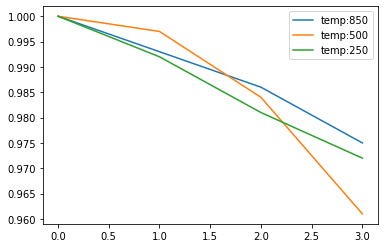

In [14]:
dTable['ACOREXP01_20140805002014080600T.scan'].loc[:,["temp:850", "temp:500", "temp:250"]].plot()

O método `loc` realiza a indexação a partir dos rótulos das colunas. Utilize o método `iloc` para realizar a subseleção a partir dos índices das linhas e colunas:

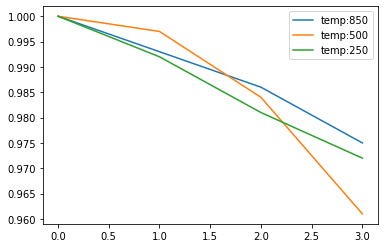

In [15]:
axes = dTable['ACOREXP01_20140805002014080600T.scan'].iloc[:,4:7].plot()

Quando múltimas colunas são selecionadas, pode-se optar pela plotagem em grupo. Para isso, basta passar o argumento `subplots=True` para dentro da função `plot()`:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd198162040>,
      dtype=object)

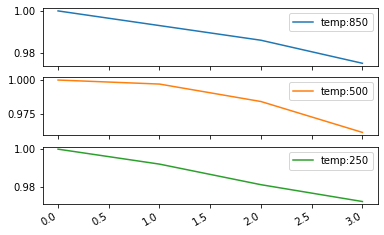

In [16]:
dTable['ACOREXP01_20140805002014080600T.scan'].loc[:,["temp:850", "temp:500", "temp:250"]].plot(subplots=True)

Veja a seguir o mesmo exemplo anterior, mas utilizando o método `iloc`:

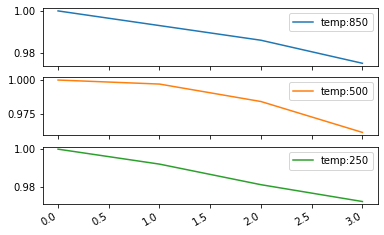

In [17]:
axes = dTable['ACOREXP01_20140805002014080600T.scan'].iloc[:,4:7].plot(subplots=True)

Outras opções de plotagem com o Pandas podem ser passadas também para a função `plot()`, veja a seguir:

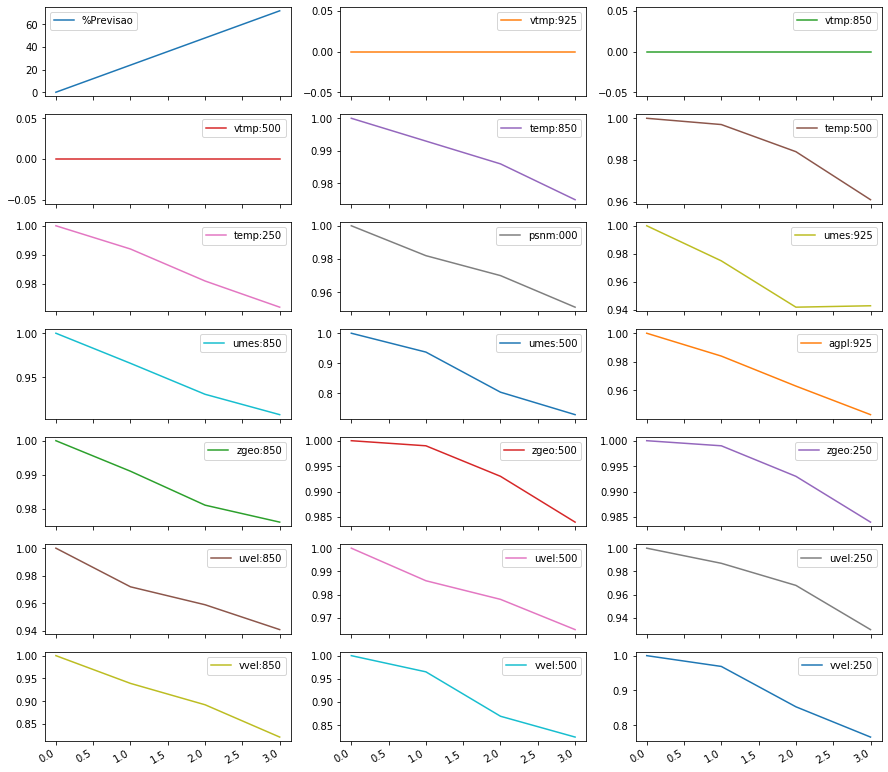

In [18]:
axes = dTable['ACOREXP01_20140805002014080600T.scan'].plot.line(subplots=True, figsize=(15,15), layout=(7,3), sharex=True)

É possível obter os índices das linhas das tabelas do SCANTEC (que representam os tempos de previsão) da seguinte forma:

In [19]:
fcts = dTable['ACOREXP01_20140805002014080600T.scan'].loc[:,"%Previsao"]

In [20]:
fcts.values

array([ 0, 24, 48, 72])

## Funções de plotagem do SCANPLOT

Tendo as tabelas do SCANTEC como dataframe do Pandas permite o acesso às facilidades associados ao módulo. O SCANPLOT possui também algumas funções de plotagem que permitem a mainupação das tabelas em lotes. A função `plot_lines` realiza a plotagem das tabelas selecionadas a partir da utilização da função `get_dataframe`.

Para chamar a função `plot_lines`, utilize o comando a seguir:

In [21]:
from scanplot import plot_lines

Assim como foi feito anteriormente para as outras funções do SCANPLOT, a ajuda da função pode ser acessada com um dos comandos a seguir:

In [22]:
#help(plot_lines)
print(plot_lines.__doc__)


    plot_lines
    
    Esta função plota um gráfico de linha a partir de um dicionário de tabelas do SCANTEC.
    
    Parâmetros de entrada
    ---------------------
        dTable : objeto dicionário com uma ou mais tabelas do SCANTEC
        Vars   : lista com os nomes e níveis das variáveis
        Stats  : lista com os nomes das estatísticas a serem processadas
        outDir : string com o diretório com as tabelas do SCANTEC
    
    Resultado
    ---------
        Figuras salvas no diretório definido na variável outDir (SCANTEC/dataout).
    
    Uso
    ---
        from scanplot import plot_lines
        
        plot_lines(dTable,Vars,Stats,outDir)
    


Veja que a função `plot_lines` recebe como parâmetros de entrada o dicionário `dTable`, as listas `Vars` e `Stats` e o diretório de saída `outDir` que será utilizado para salvar as figuras produzidas. Veja a seguir como utilizar a função `plot_lines`:

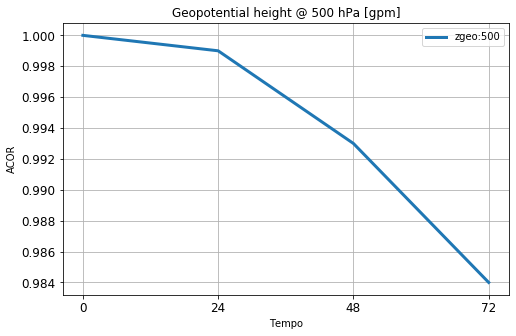

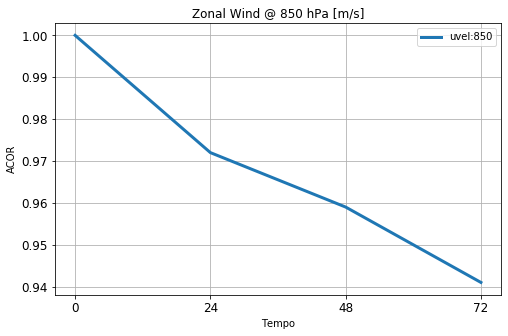

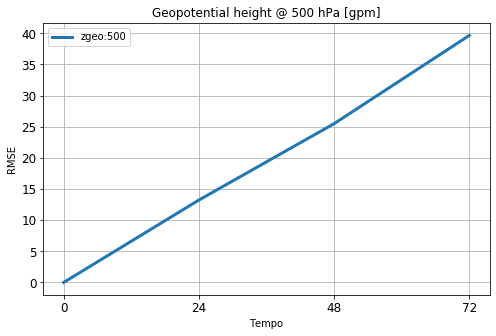

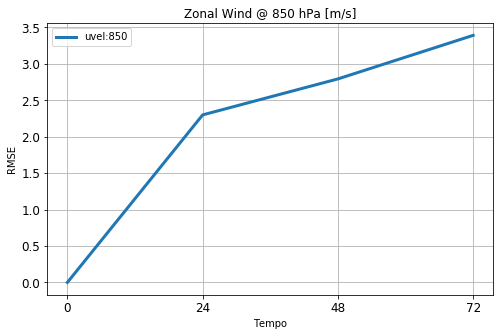

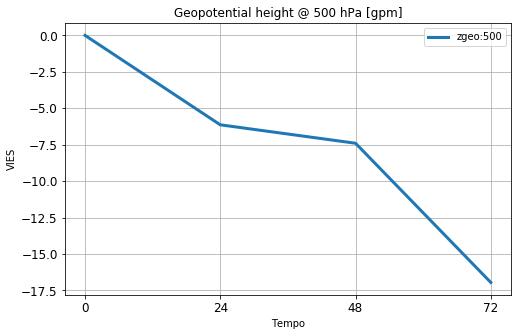

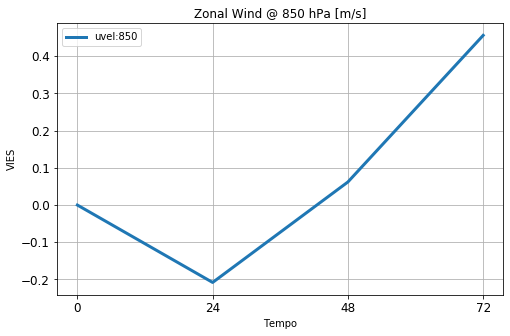

In [23]:
plot_lines(dTable,Vars,Stats,outDir)